<a href="https://colab.research.google.com/github/Krishu1550/CNN/blob/main/Parking_Slot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Jan 20 15:30:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import cv2
import numpy as np


In [11]:
# Loading Mask RCNN
net = cv2.dnn.readNetFromTensorflow("dnn/frozen_inference_graph_coco.pb",
									"dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt")


In [3]:
img = cv2.imread("/content/parking_img.jpeg")
height, width, _ = img.shape

In [4]:
#Generate random colors
colors = np.random.randint(0, 255, (80, 3))

In [5]:
# Create black image
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (100, 100, 0)


In [12]:
# Detect objects
blob = cv2.dnn.blobFromImage(img, swapRB=True)
net.setInput(blob)

In [13]:
boxes, masks = net.forward(["detection_out_final", "detection_masks"])
detection_count = boxes.shape[2]


In [8]:
from google.colab.patches import cv2_imshow

In [7]:
! pip install cvzone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18767 sha256=93df1f15940c1b246863d53fad9a1fcd440edcfec4d7e7ceadcd51a53c426509
  Stored in directory: /root/.cache/pip/wheels/67/60/9a/e5060027d8eae2c01ba872fdbc094a6fe3fee15794ee3dc709
Successfully built cvzone


In [9]:
import cvzone

In [10]:
count_num=0
total_space=40

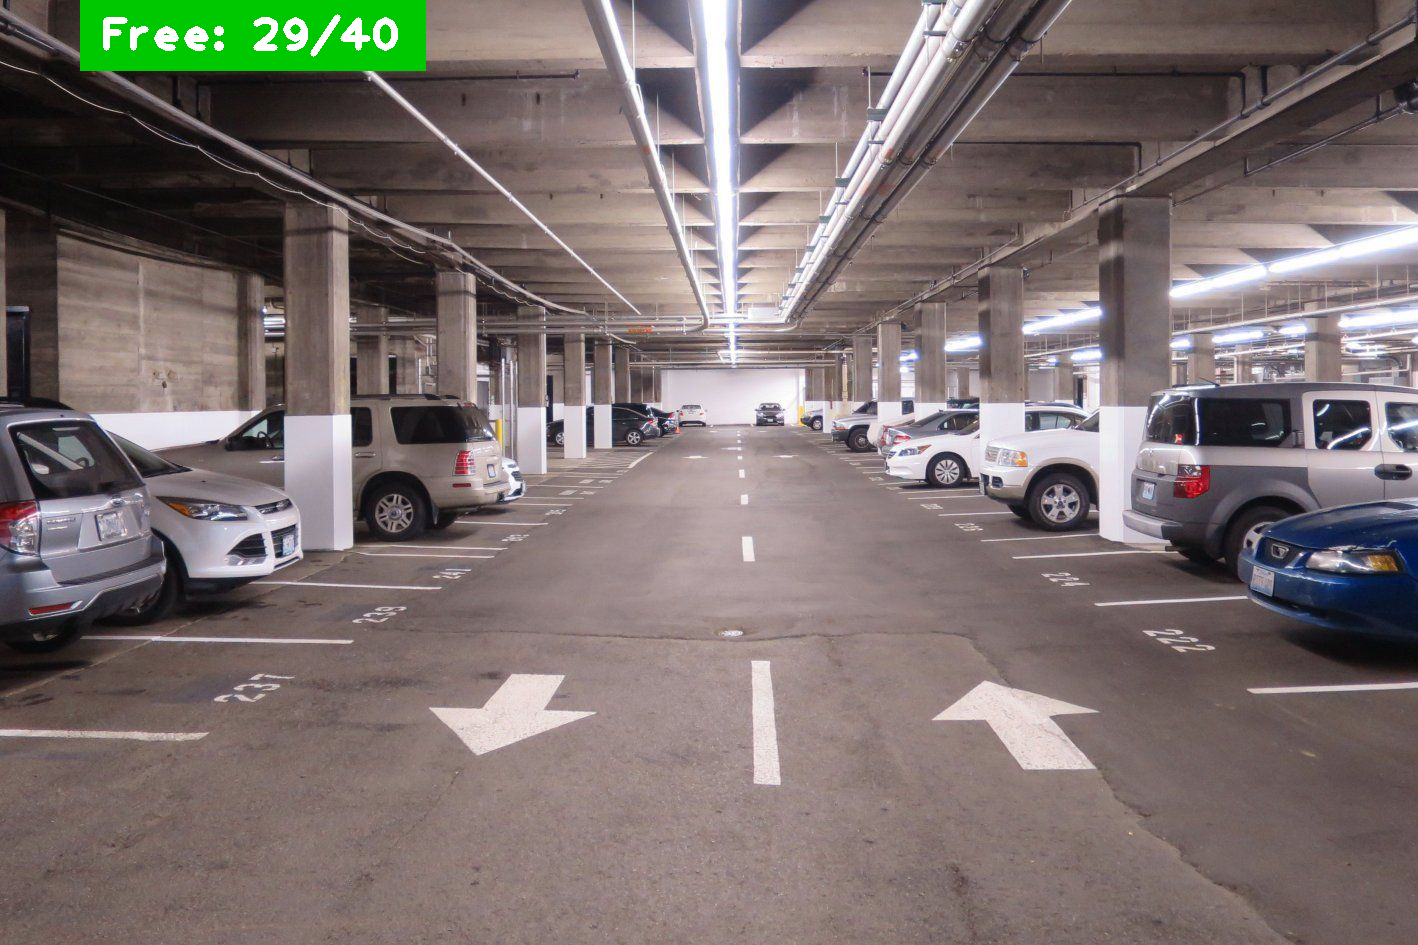

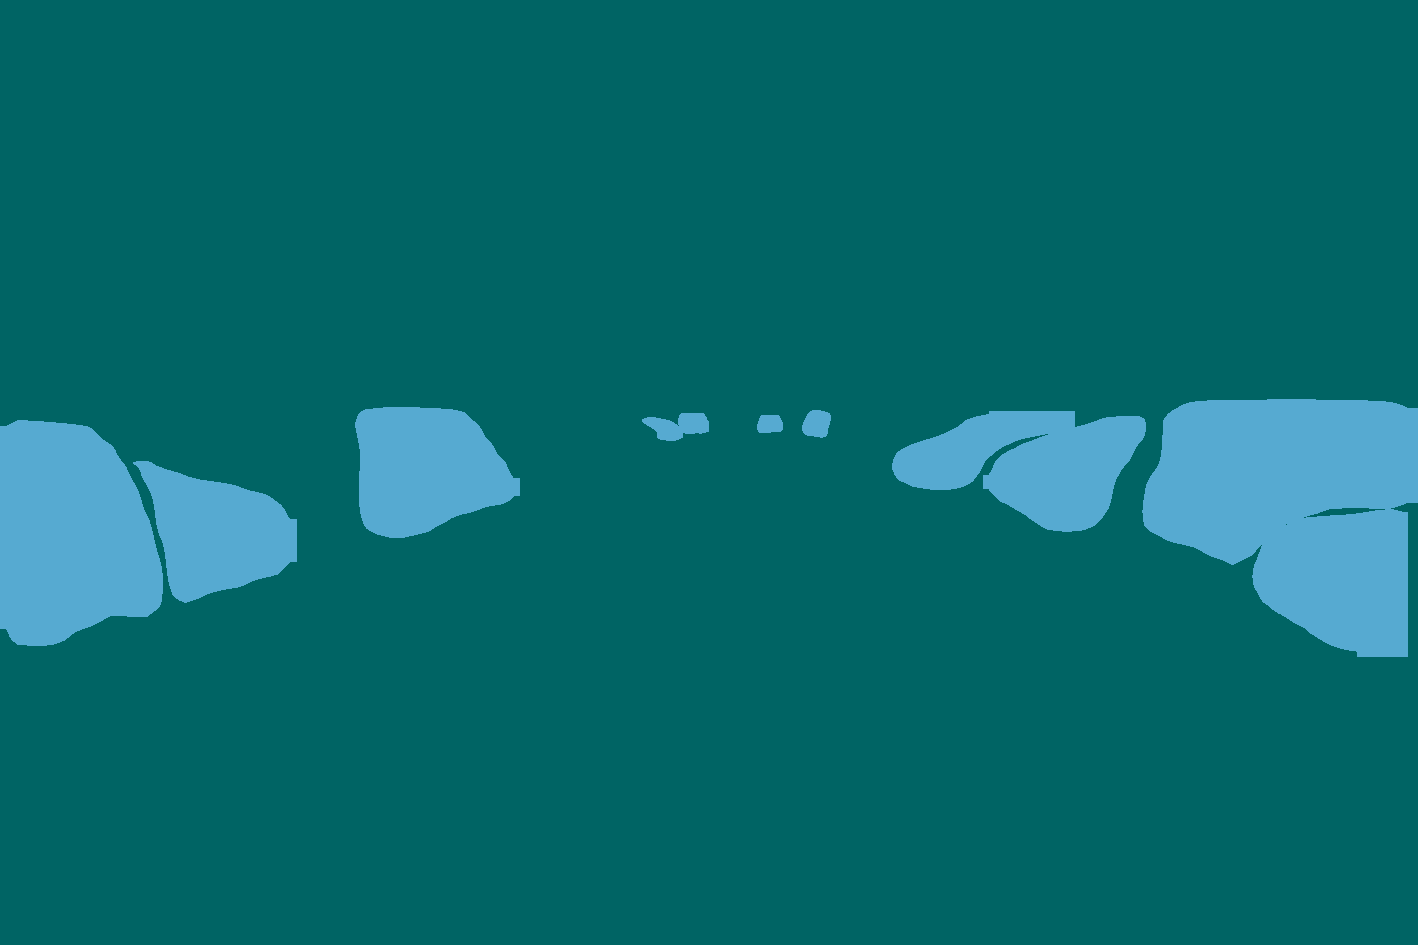

11


-1

In [14]:
for i in range(detection_count):
    box = boxes[0, 0, i]
    class_id = box[1]
    score = box[2]
    if score < 0.5:
      continue
    if int(box[1])==2:
      # Get box Coordinates
      x = int(box[3] * width)
      y = int(box[4] * height)
      x2 = int(box[5] * width)
      y2 = int(box[6] * height)
      count_num= count_num+1

      #print(count_num)
      roi = black_image[y: y2, x: x2]
      roi_height, roi_width, _ = roi.shape

      # Get the mask
      mask = masks[i, int(class_id)]
      mask = cv2.resize(mask, (roi_width, roi_height))
      _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

      #cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 3)
      cvzone.putTextRect(img, f'Free: {total_space-count_num}/{total_space}', (100, 50), scale=3,
                           thickness=5, offset=20, colorR=(0, 200, 0))
      # Get mask coordinates
      contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      color = colors[int(class_id)]
      for cnt in contours:
        cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))

      # cv2.imshow("roi", roi)
      # cv2.waitKey(0)


cv2_imshow(img)
cv2_imshow(black_image)
print(count_num)
cv2.waitKey(0)